# Installing Packages

In [ ]:
# Install PyTorch with GPU support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Clone the MoCo repository
!git clone https://github.com/facebookresearch/moco.git
%cd moco

# Install other dependencies (if needed)
!pip install numpy matplotlib


Looking in indexes: https://download.pytorch.org/whl/cu118
Cloning into 'moco'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 124 (delta 58), reused 101 (delta 49), pack-reused 0 (from 0)
Receiving objects: 100% (124/124), 64.75 KiB | 2.40 MiB/s, done.
Resolving deltas: 100% (58/58), done.
/content/moco


# Importing Packages
# We are Taking cifar 10 dataset instead of Image Net as prescribed in the paper

In [ ]:
from torchvision import datasets, transforms

# Define CIFAR-10 dataset
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Resize to 224x224 (like ImageNet)
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)


100%|██████████| 170M/170M [00:02<00:00, 74.1MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


# Setting the path

In [ ]:
import os
from torchvision import datasets, transforms
from torch.utils.data import random_split
from shutil import rmtree
from PIL import Image

# Paths for the dataset
data_root = './data'
train_dir = os.path.join(data_root, 'train')
val_dir = os.path.join(data_root, 'val')

# Transformation for CIFAR-10
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Download the CIFAR-10 dataset
cifar10_full = datasets.CIFAR10(root=data_root, train=True, download=True, transform=transform)
cifar10_test = datasets.CIFAR10(root=data_root, train=False, download=True, transform=transform)

# Split CIFAR-10 into train and validation (50,000 train, 10,000 val)
train_size = int(0.8 * len(cifar10_full))
val_size = len(cifar10_full) - train_size
train_dataset, val_dataset = random_split(cifar10_full, [train_size, val_size])

# Helper function to save images into class-based directories
def save_dataset(dataset, target_dir):
    if os.path.exists(target_dir):
        rmtree(target_dir)
    os.makedirs(target_dir)
    for idx, (image, label) in enumerate(dataset):
        class_dir = os.path.join(target_dir, str(label))
        os.makedirs(class_dir, exist_ok=True)
        # Convert tensor to PIL image
        pil_image = transforms.ToPILImage()(image)
        pil_image.save(os.path.join(class_dir, f"{idx}.png"))

# Save the datasets
save_dataset(train_dataset, train_dir)
save_dataset(val_dataset, val_dir)

print("Datasets saved successfully!")


Files already downloaded and verified
Files already downloaded and verified
Datasets saved successfully!


In [ ]:
!ls ./data/train/
!ls ./data/val/

0  1  2  3  4  5  6  7	8  9
0  1  2  3  4  5  6  7	8  9


In [ ]:
!pip install torchvision torch


In [ ]:
!pip install --upgrade torchvision

In [ ]:
!python main_moco.py ./data --gpu 0 --batch-size 128 --epochs 200

/content/moco/main_moco.py:196: UserWarning: You have chosen a specific GPU. This will completely disable data parallelism.
  warnings.warn(
Use GPU: 0 for training
=> creating model 'resnet50'
MoCo(
  (encoder_q): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1

In [ ]:
import os
print("Current Directory:", os.getcwd())
print("File Exists:", os.path.exists('checkpoint.pth.tar'))


Current Directory: /content/moco
File Exists: False


In [ ]:
!wget https://dl.fbaipublicfiles.com/moco/moco_checkpoints/moco_v2_200ep/.pth.tar -O moco_v2_checkpoint_200.pth.tar


--2024-11-19 18:09:13--  https://dl.fbaipublicfiles.com/moco/moco_checkpoints/moco_v2_200ep/.pth.tar
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.102, 108.157.254.121, 108.157.254.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.102|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-11-19 18:09:14 ERROR 403: Forbidden.



In [ ]:
import os
print("File Exists:", os.path.exists('moco_v2_checkpoint_200.pth.tar'))



File Exists: True


In [ ]:
import torchvision.models as models

# Define a ResNet-50 model
model = models.resnet50()


In [ ]:
import torch

# Load the checkpoint
checkpoint = torch.load('moco_v2_checkpoint_200.pth.tar', map_location='cuda:0')

# Load the state dictionary into the model
model.load_state_dict(checkpoint['state_dict'], strict=False)  # Use strict=False if not all keys match


<ipython-input-22-ec30e35f0d53>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('moco_v2_checkpoint_200.pth.tar', map_location='cuda:0')


EOFError: Ran out of input

In [ ]:
model = model.cuda()
model.eval()  # Set model to evaluation mode if testing


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

# Define transformations for the test dataset
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.247, 0.243, 0.261]),
])

# Specify the dataset path
test_dataset_path = '/content/moco/data/val'

# Load the test dataset using ImageFolder
test_dataset = ImageFolder(root=test_dataset_path, transform=test_transforms)

# Create a DataLoader for the test dataset
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

print("Test dataset loaded successfully.")


Test dataset loaded successfully.


In [ ]:
import torch
from torchvision.models import resnet50

# Load the pre-trained MoCo weights
checkpoint = torch.load('moco_v2_checkpoint_200.pth.tar', map_location='cuda:0')

# Extract the weights for encoder_q
state_dict = checkpoint['state_dict']

# Remove "module.encoder_q." prefix from the keys in the state_dict
new_state_dict = {k.replace("module.encoder_q.", ""): v for k, v in state_dict.items() if "encoder_q" in k}

# Initialize the standard ResNet-50 architecture
model = resnet50(num_classes=128)  # MoCo's output feature dimension is 128
model.load_state_dict(new_state_dict, strict=False)
model = model.cuda()
model.eval()

# Test the model
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.cuda(), labels.cuda()
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate and print accuracy
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


<ipython-input-15-b398035c3377>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('moco_v2_checkpoint_200.pth.tar', map_location='cuda:0')


Test Accuracy: 1.88%


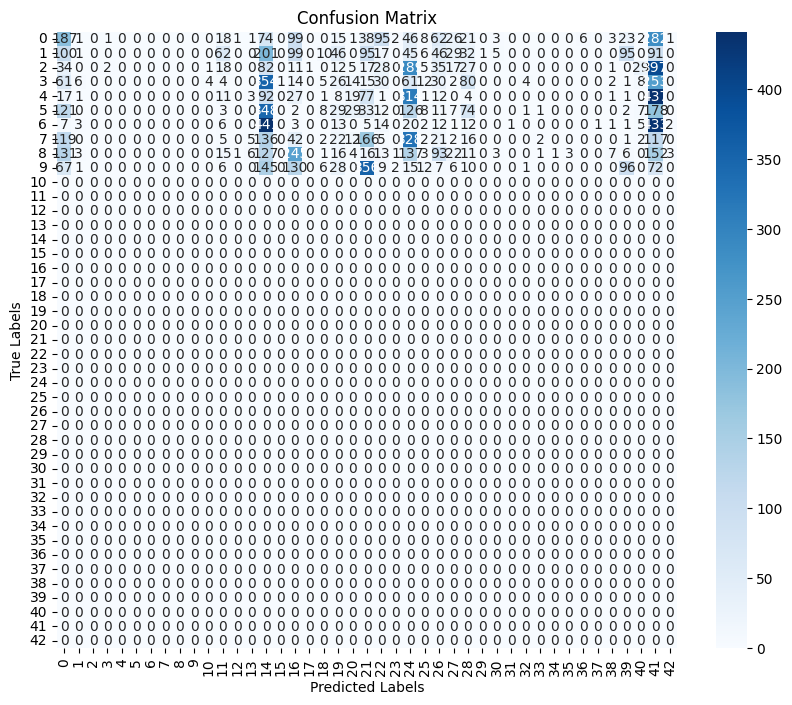

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = []  # Ground truth labels
y_pred = []  # Model predictions

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.cuda()
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Remove the final classification layer to extract features
feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])
feature_extractor.eval()

features = []

with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.cuda()
        outputs = feature_extractor(inputs)
        features.append(outputs.cpu().numpy())

print("Features extracted for downstream tasks.")


Features extracted for downstream tasks.


In [ ]:
import torch.nn as nn
from torchvision.models import resnet50

# Load the pre-trained MoCo model
checkpoint = torch.load('moco_v2_checkpoint_200.pth.tar', map_location='cuda:0')

# Initialize the ResNet-50 backbone
model = resnet50(num_classes=128)  # MoCo uses 128-dimensional embeddings
model.load_state_dict(checkpoint['state_dict'], strict=False)

# Modify the fully connected layer for CIFAR-10
num_classes = 10  # Replace with the number of classes in your dataset
model.fc = nn.Linear(in_features=model.fc.in_features, out_features=num_classes)

model = model.cuda()
model.eval()


<ipython-input-18-e72f13ff7b11>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('moco_v2_checkpoint_200.pth.tar', map_location='cuda:0')


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader


In [ ]:
train_transforms = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]),
])


In [ ]:
train_dataset = CIFAR10(root='./data', train=True, download=True, transform=train_transforms)


Files already downloaded and verified


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)


In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import torch.nn as nn

# Define data transformations for the training dataset
train_transforms = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]),
])

# Load CIFAR-10 training dataset
train_dataset = CIFAR10(root='./data', train=True, download=True, transform=train_transforms)

# Create DataLoader for training data
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)

# Unfreeze all layers
for param in model.parameters():
    param.requires_grad = True

# Define optimizer and loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()

# Fine-tune the model on your training dataset
for epoch in range(250):  # Choose the number of epochs
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.cuda(), labels.cuda()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if i % 100 == 0:  # Print loss every 100 batches
            print(f"Epoch [{epoch+1}/250], Step [{i}/{len(train_loader)}], Loss: {loss.item():.4f}")

print("Fine-tuning completed.")


Files already downloaded and verified
Epoch [1/250], Step [0/782], Loss: 1.9515
Epoch [1/250], Step [100/782], Loss: 1.6781
Epoch [1/250], Step [200/782], Loss: 1.7327
Epoch [1/250], Step [300/782], Loss: 1.7393
Epoch [1/250], Step [400/782], Loss: 2.1190
Epoch [1/250], Step [500/782], Loss: 1.6230
Epoch [1/250], Step [600/782], Loss: 1.9977
Epoch [1/250], Step [700/782], Loss: 1.8725
Epoch [2/250], Step [0/782], Loss: 1.9181
Epoch [2/250], Step [100/782], Loss: 1.5802
Epoch [2/250], Step [200/782], Loss: 1.7969
Epoch [2/250], Step [300/782], Loss: 1.8759
Epoch [2/250], Step [400/782], Loss: 1.6669
Epoch [2/250], Step [500/782], Loss: 1.7099
Epoch [2/250], Step [600/782], Loss: 1.6432
Epoch [2/250], Step [700/782], Loss: 1.5814
Epoch [3/250], Step [0/782], Loss: 1.5614
Epoch [3/250], Step [100/782], Loss: 1.4069
Epoch [3/250], Step [200/782], Loss: 1.4759
Epoch [3/250], Step [300/782], Loss: 1.5059
Epoch [3/250], Step [400/782], Loss: 1.3580
Epoch [3/250], Step [500/782], Loss: 1.8125


In [ ]:
model.eval()  # Set model to evaluation mode

correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.cuda(), labels.cuda()
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy after fine-tuning: {accuracy:.2f}%")


Test Accuracy after fine-tuning: 11.03%


In [ ]:
import matplotlib.pyplot as plt

epochs = range(len(train_losses))  # Assuming `train_losses` is a list of loss values
plt.plot(epochs, train_losses, label="Training Loss")
plt.plot(epochs, val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()

plt.plot(epochs, train_accuracies, label="Training Accuracy")
plt.plot(epochs, val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()


NameError: name 'train_losses' is not defined

In [ ]:
!git clone https://github.com/Gouthami1907/moco.git


fatal: destination path 'moco' already exists and is not an empty directory.


In [ ]:
!git clone https://github.com/ShivVIT2019/Machine_Learning_Project.git


Cloning into 'Machine_Learning_Project'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), done.


In [ ]:
!git remote add my_fork https://github.com/Gouthami1907/moco.git


In [ ]:
!cp -r /content/moco/* /content/<group_repo>/

From https://github.com/Gouthami1907/moco
 * [new branch]      main       -> my_fork/main


In [ ]:
!git merge my_fork/main

Already up to date.


In [ ]:
!git push origin main


fatal: could not read Username for 'https://github.com': No such device or address
